In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

# Download and unzip the dataset
api.dataset_download_files('mlg-ulb/creditcardfraud', path='data/raw', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('data/raw/creditcard.csv')

# Class balance
print(df['Class'].value_counts(normalize=True))
print("--------------------------------------------")

# Basic statistics
print(df.describe())
print("--------------------------------------------")

# Basic Dtype info
print(df.info())

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64
--------------------------------------------
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.

In [4]:
# View on the dataset
print("General View on the Dataset:")
df.head()

General View on the Dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#List of dtypes among the columns
print("Data types of each column:")
df.dtypes

Data types of each column:


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

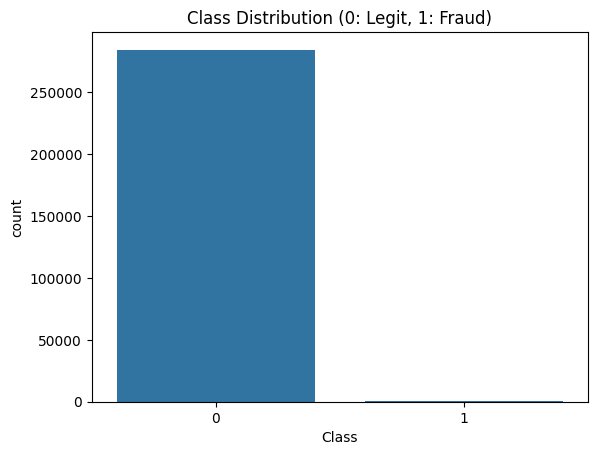

In [6]:
# Visuals
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0: Legit, 1: Fraud)")
plt.show()

In [7]:
# Count number of na values
print("Count on Null Values on Each Column: ")
df.isna().sum(axis = 0)

Count on Null Values on Each Column: 


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Count number of duplicated values
print("Count on Duplicated Values on Each Column: ")
df.duplicated().sum()

Count on Duplicated Values on Each Column: 


np.int64(1081)

There seems to be 1081 duplicating records, but considering the columns are with float type along with 1081 amount of data being dismissable comparing to the total of 284807 data, it can be kept left. 

In [9]:
# Function to save Data Vis 
import os

def save_plot(filename):
    os.makedirs("images", exist_ok=True)
    plt.tight_layout()
    plt.savefig(f"images/{filename}")
    plt.show()

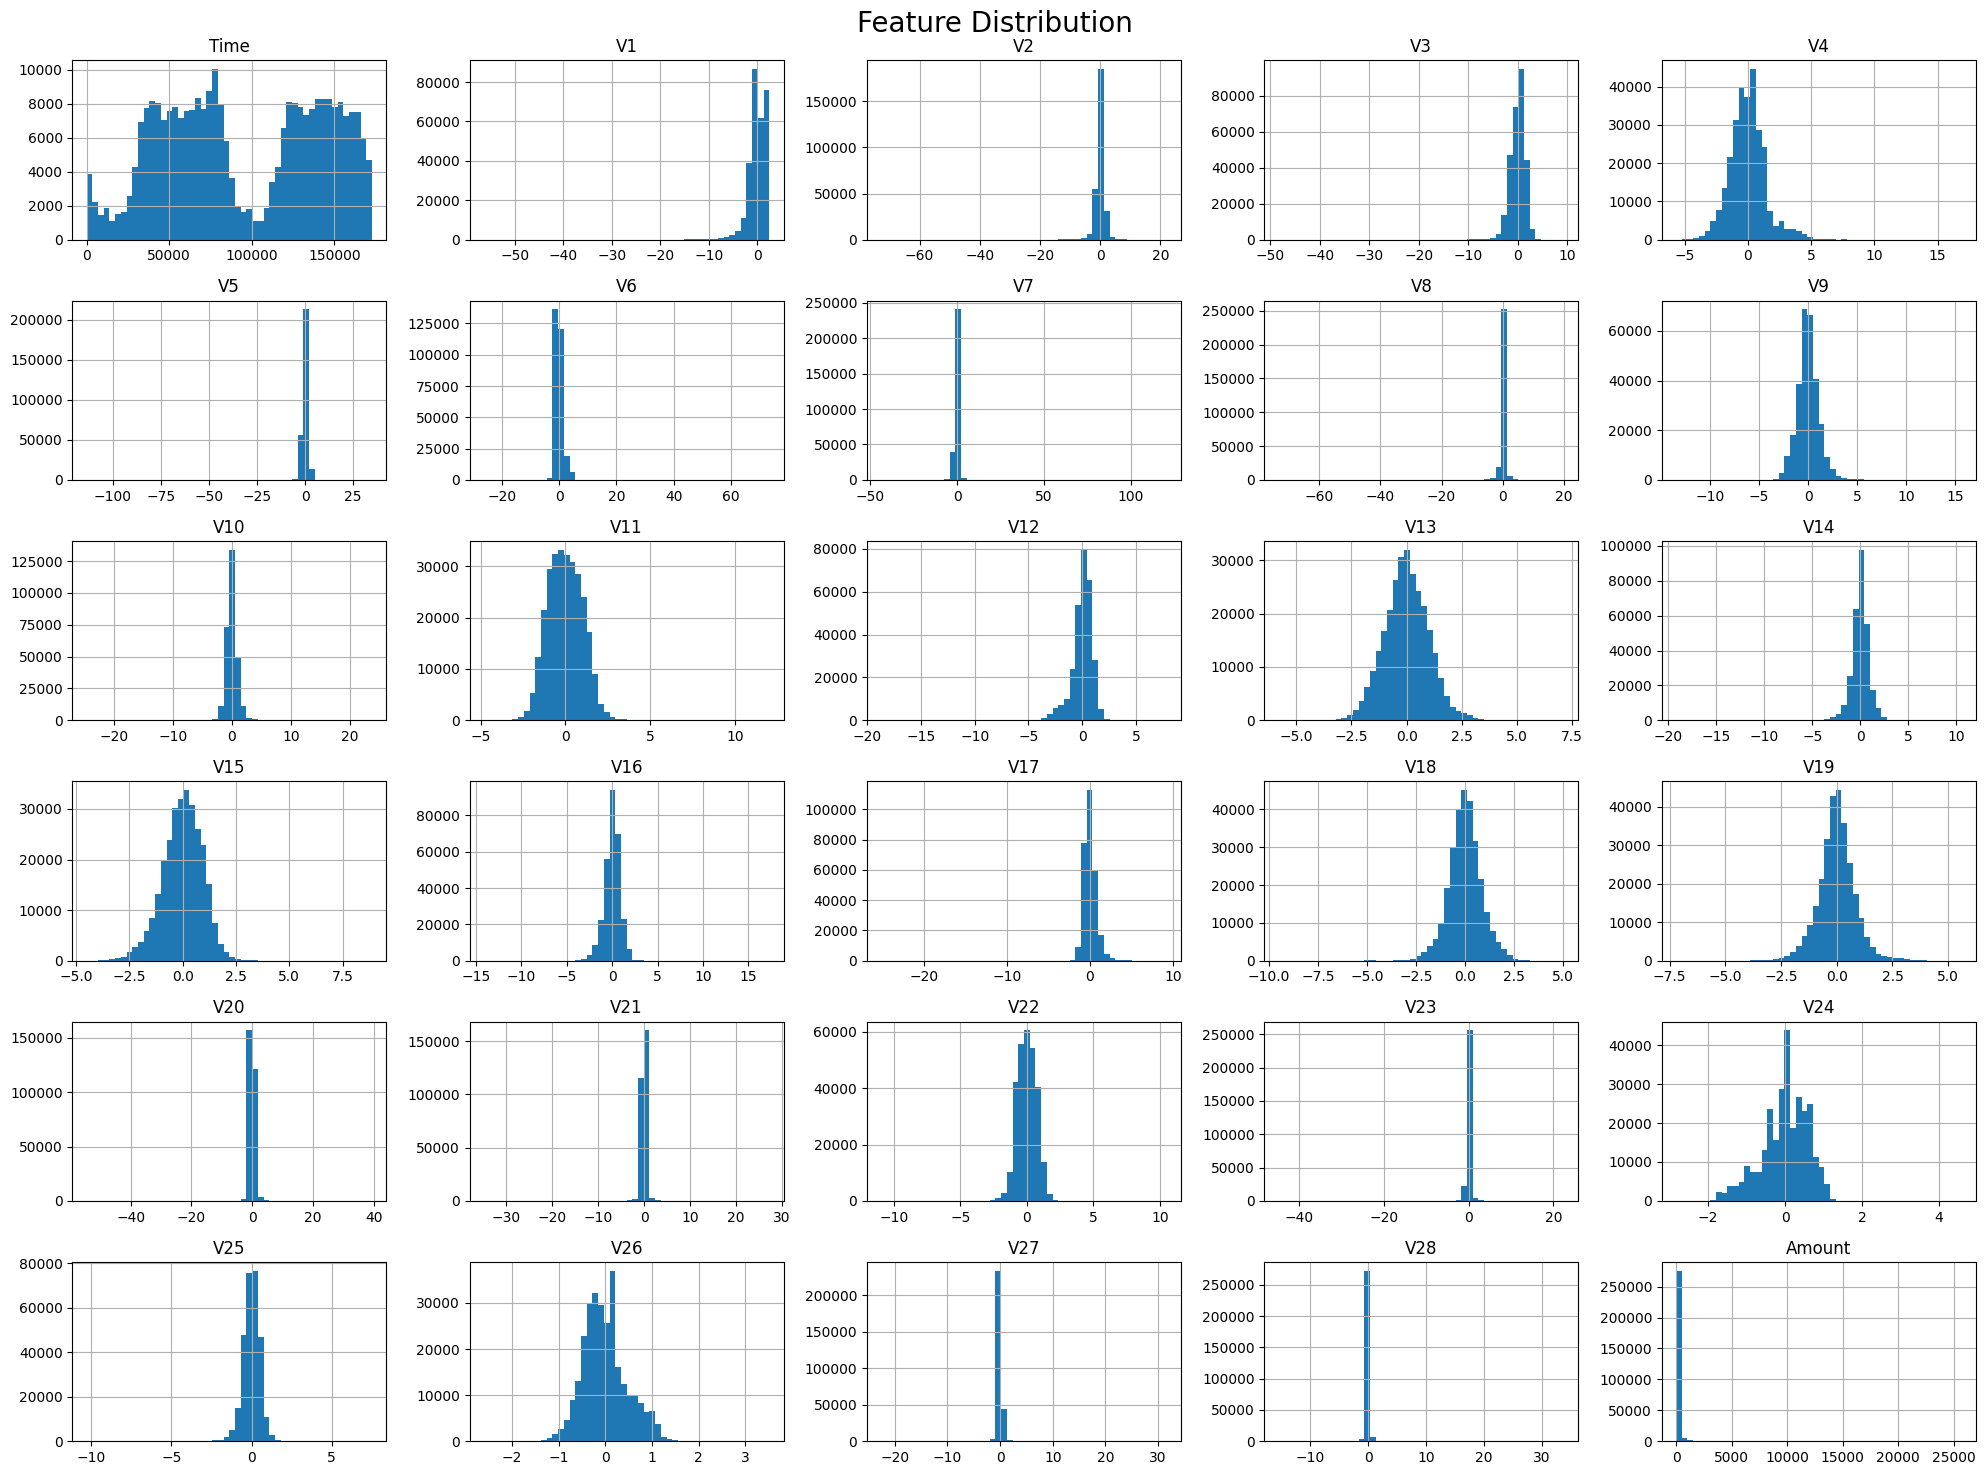

In [10]:
# Feature distribution
df.drop('Class', axis = 1).hist(figsize = (20, 15), bins = 50)
plt.suptitle('Feature Distribution', fontsize = 20)
save_plot('feature_distribution.png')

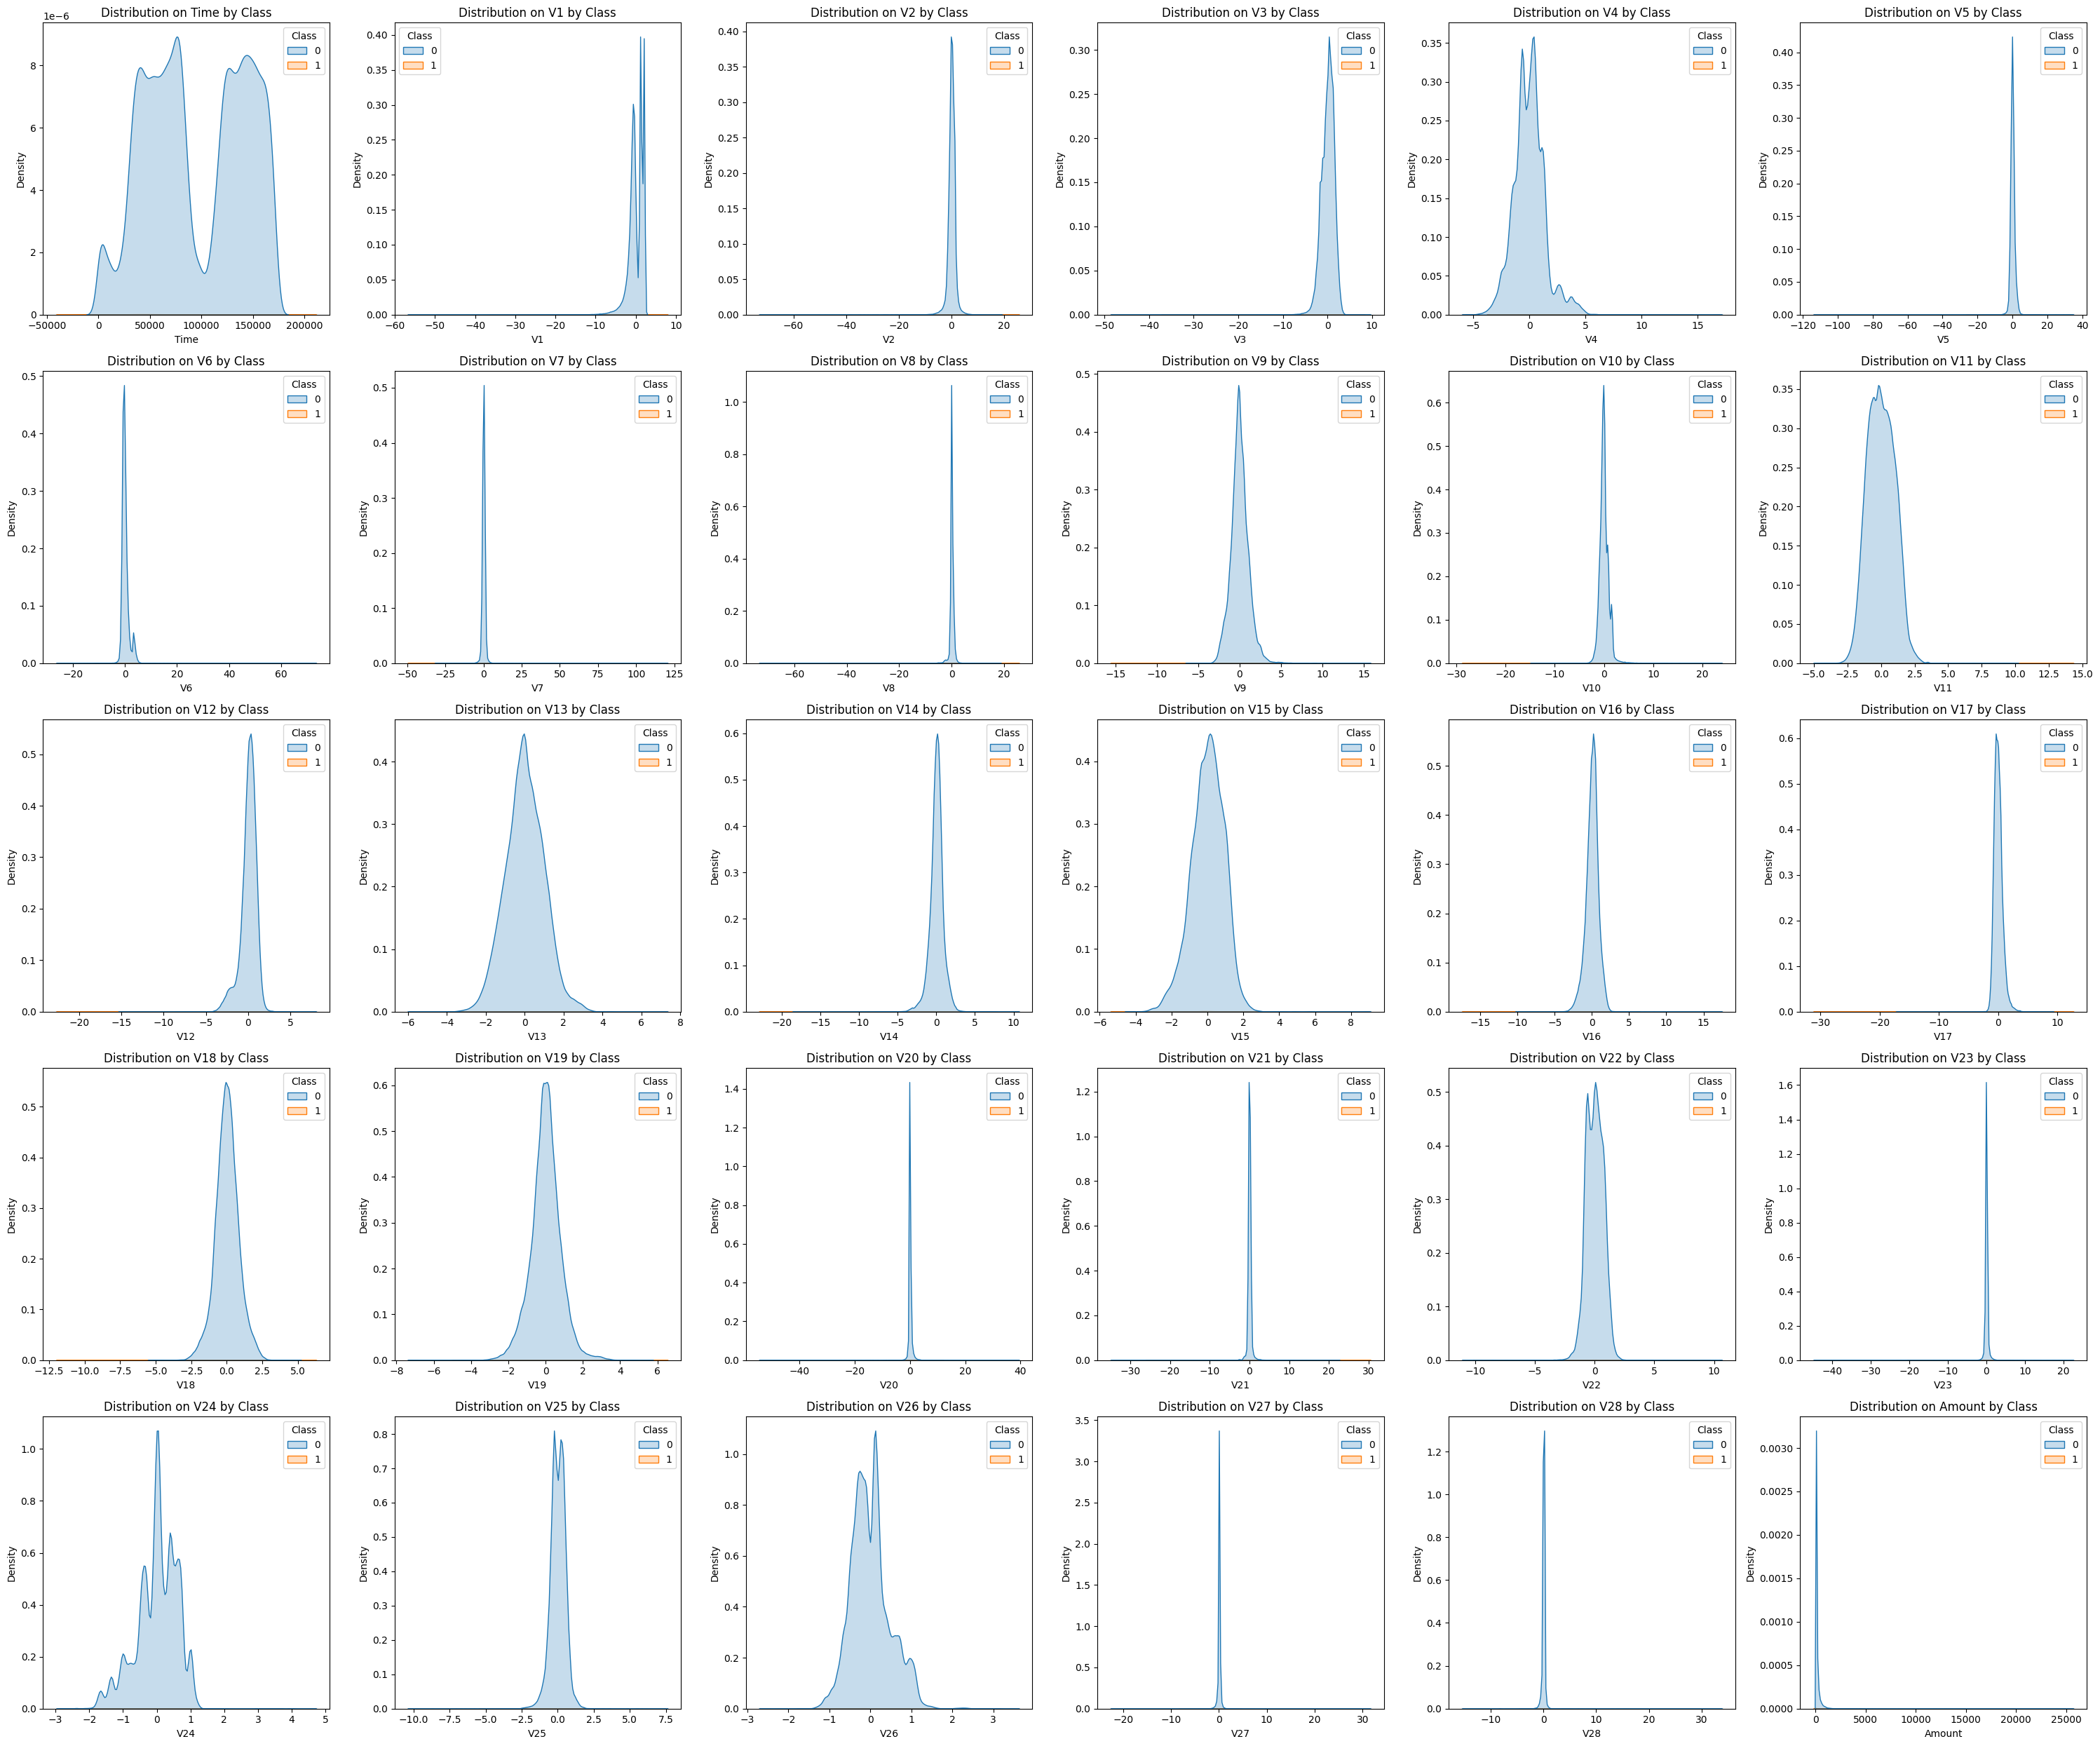

In [11]:
# Check Distribution of Each Column based on its Corresponding Class
cols = df.columns.drop(['Class'])
ncol = 6
nrow = len(cols) // ncol 

fig, axes = plt.subplots(nrow, ncol, figsize = (30, 25))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.kdeplot(data = df, x = col, hue = 'Class', fill = True, ax = axes[i])
    axes[i].set_title(f'Distribution on {col} by Class')
    axes[i].set_ylabel('Density')

for j in range(i + 1, len(cols)):
    fig.delaxes(axes[j])

save_plot('multivariate_kde_analysis.png')

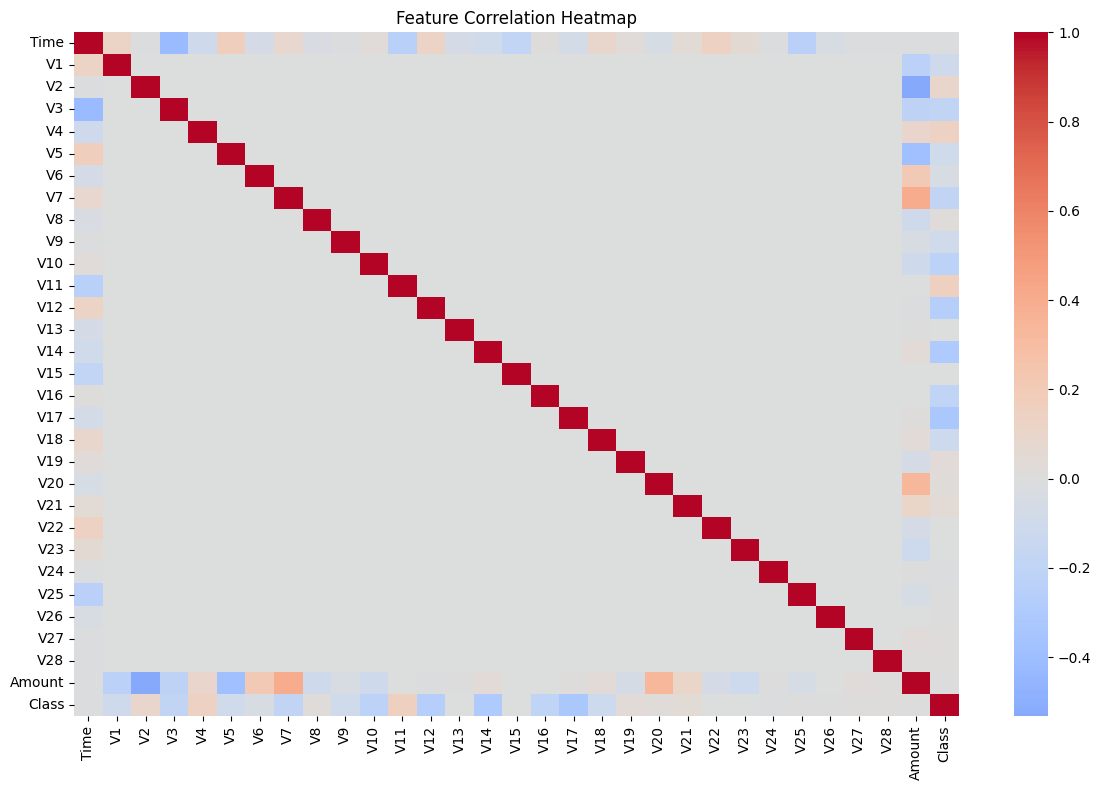

In [12]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
save_plot('feature_corr_heatmap.png')

### General
* From V1 ~ V28 each of these anonymous column is not correlated with each other 

### Class (Target Variable)
* Class correlation is low for all features - which is typical due to class imbalance
* Still, V17, V4, and V14 seem to have a slight positive correlation — potential weak signal features.

### Amount
### Positive Correlation 
* 1)V7 correlated the most 2) V20 3) V6 4) V21 5) V4

### Negative Correlation
* 1)V2 negatively correlated the most 2) V5 3) V3 4) V1 

### Time
### Positive Correlation 
* 1)V5 correlated the most (But not with strong positivity) 2) V22

### Negative Correlation
* 1)V3 negatively correlated the most 2) V25 3) V11 4) V15 

OVerall Amount and Time seem to have almost no correlation with each other - useful to know for modelling

/tmp/ipykernel_2263/715537501.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_class.values, y=correlation_with_class.index, palette='coolwarm')


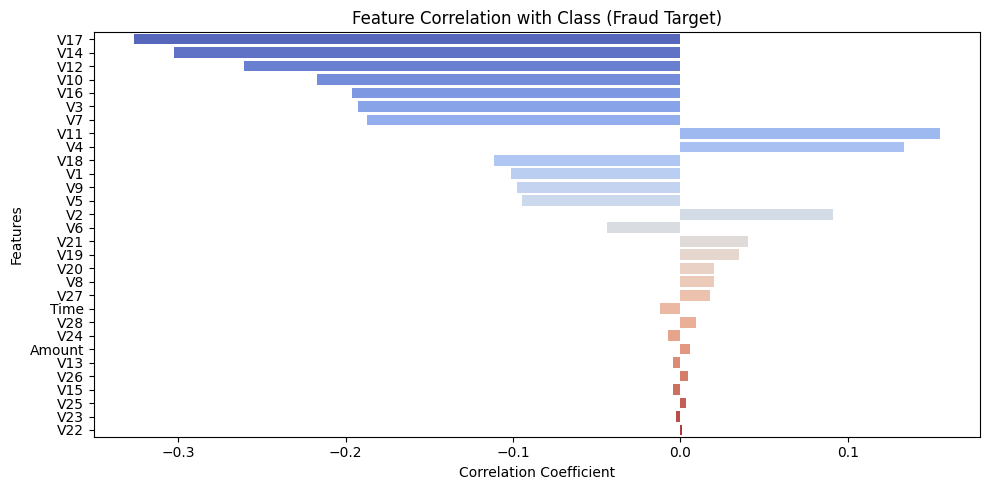

In [13]:
# 🧠 1. Correlation with Target Variable Class
correlation_with_class = df.corr(numeric_only=True)['Class'].drop('Class').sort_values(key=abs, ascending=False)

# Barplot of correlation with Class
plt.figure(figsize=(10, 5))
sns.barplot(x=correlation_with_class.values, y=correlation_with_class.index, palette='coolwarm')
plt.title("Feature Correlation with Class (Fraud Target)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [14]:
# Top correlated features with 'Class'
correlations = df.corr()['Class'].sort_values(ascending = False)
print('Top Correlated Features with fraud:')
print(correlations.head(10))
print('\nLeast Correlated Features: ')
print(correlations.tail(5))

Top Correlated Features with fraud:
Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64

Least Correlated Features: 
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


As we know the important columns that show some correlation with the target label, we will see these columns more specifically with kde plots

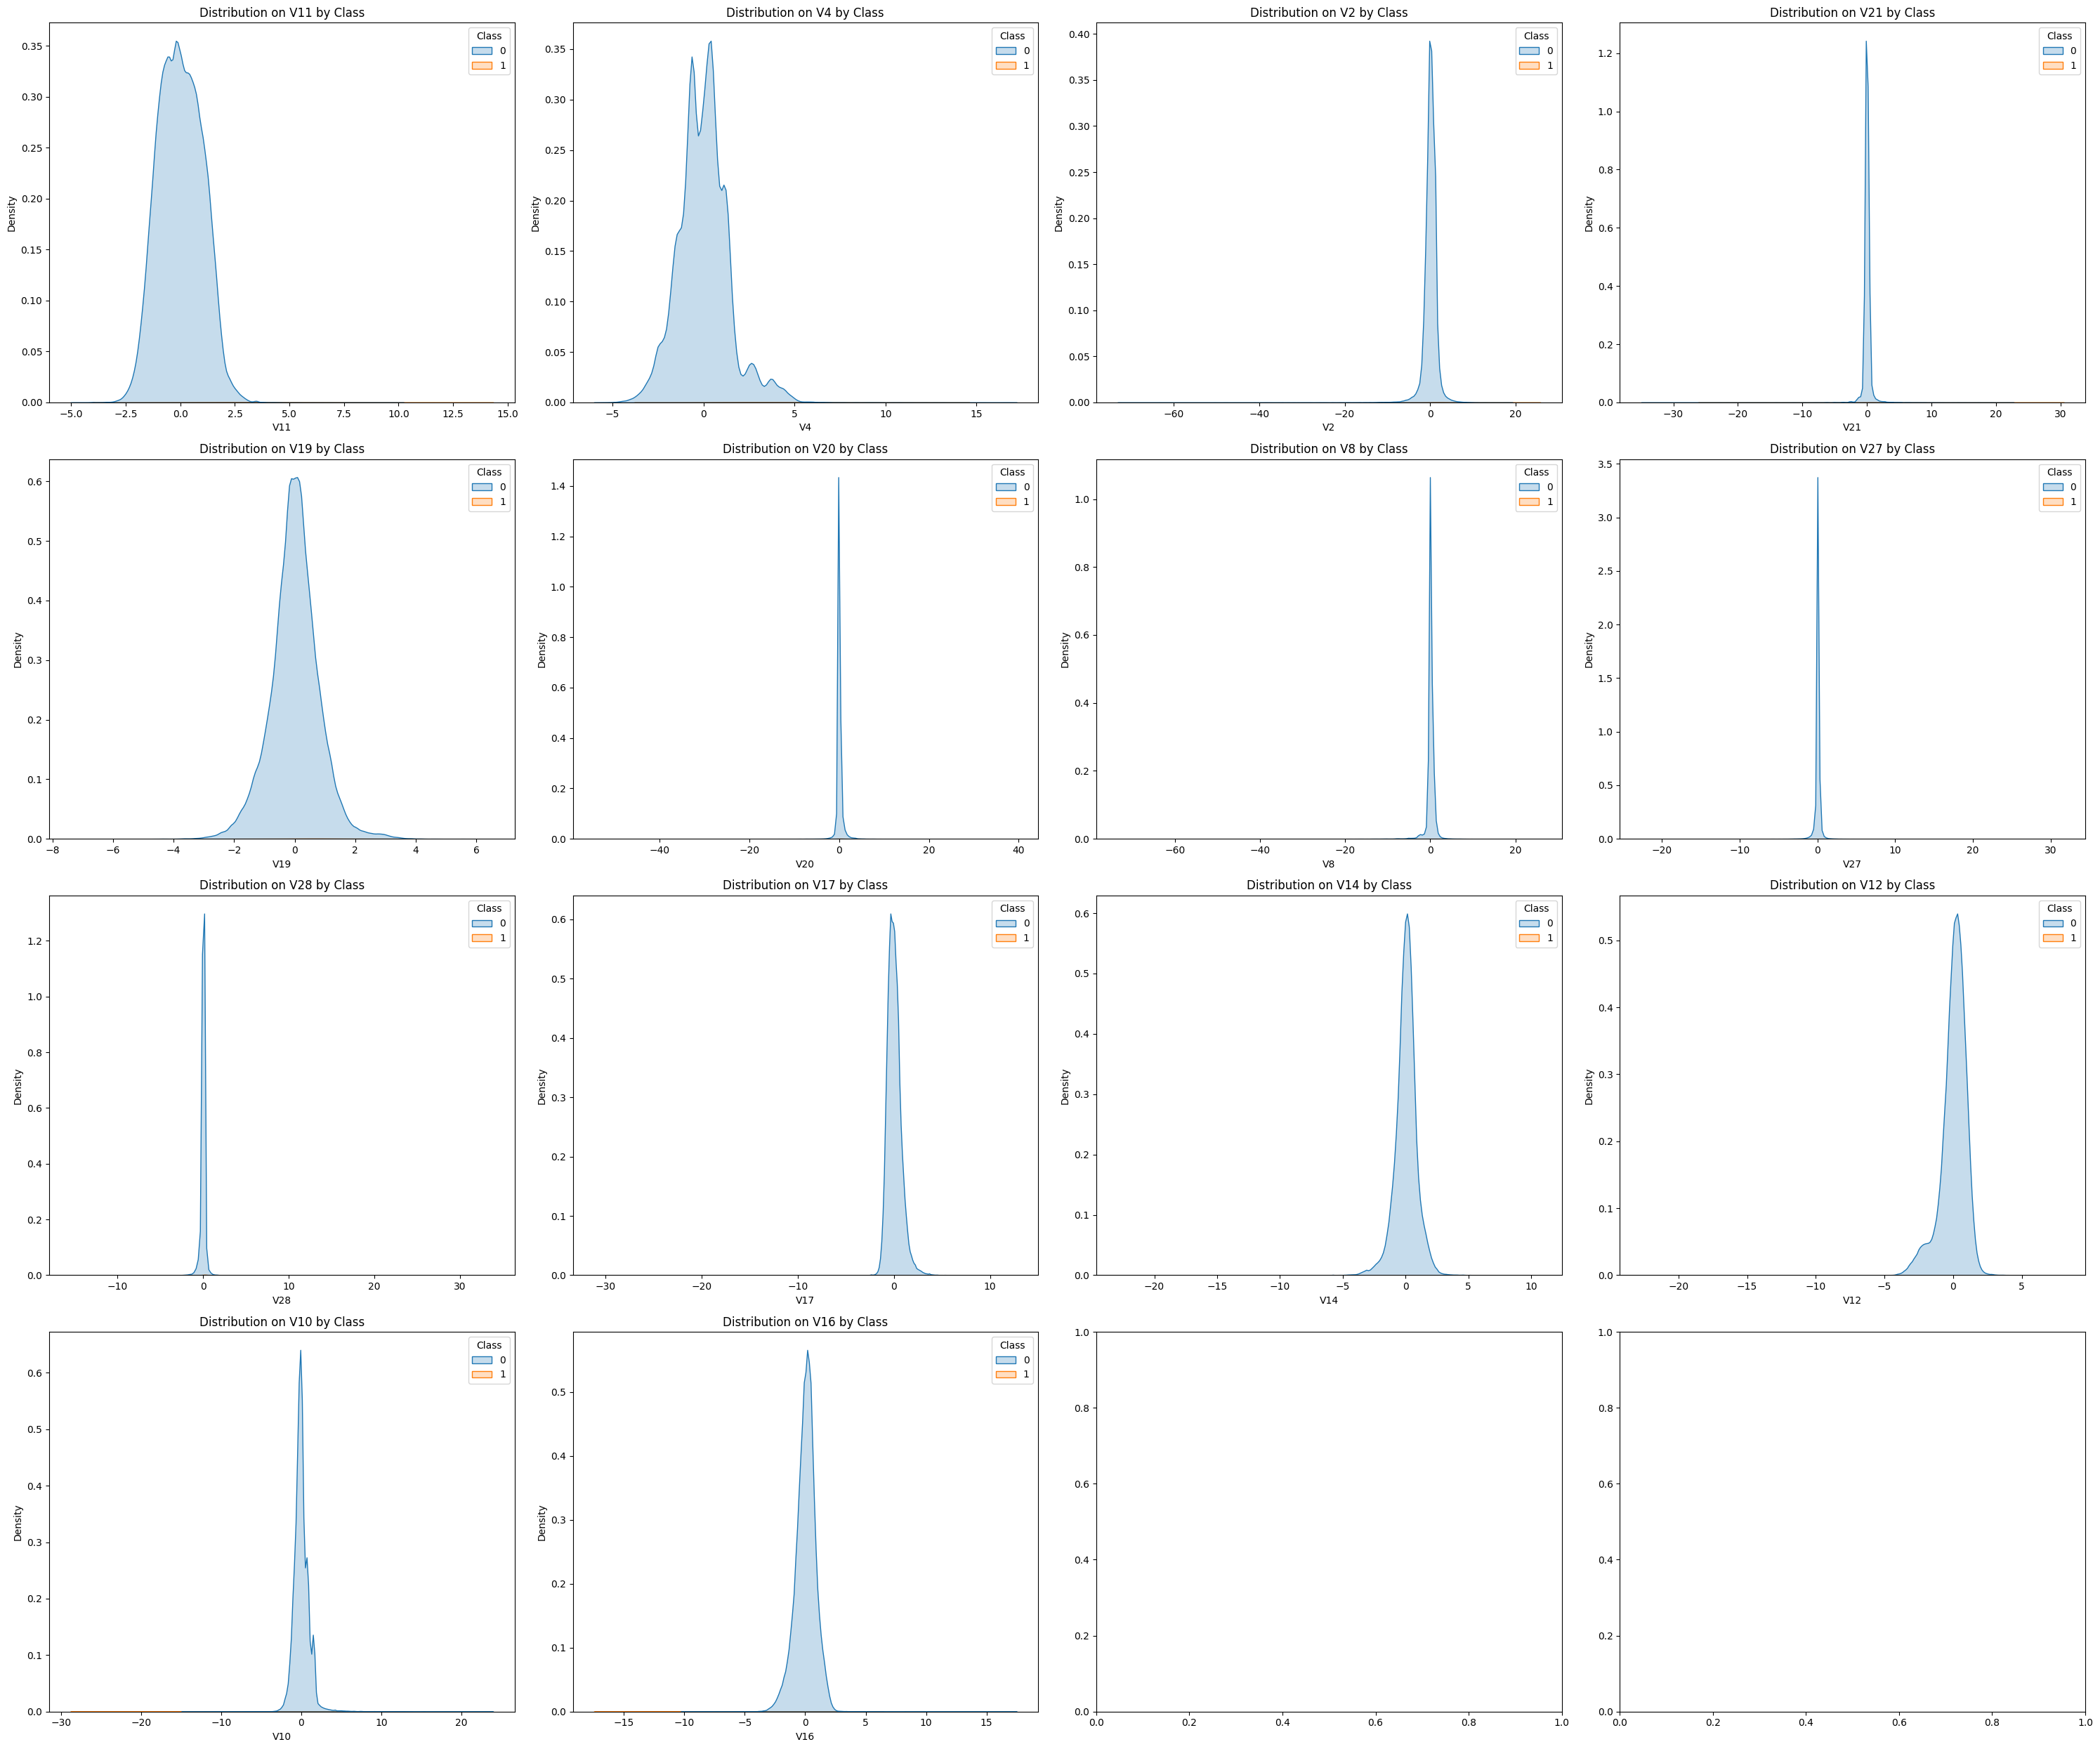

In [16]:
important_cols = ['V11', 'V4', 'V2', 'V21', 'V19', 'V20', 'V8', 'V27', 'V28',
                  'V17', 'V14', 'V12', 'V10', 'V16']

ncol = 4
nrow = len(important_cols) // ncol + 1

fig, axes = plt.subplots(nrow, ncol, figsize = (30, 25))
axes = axes.flatten()

for i, col in enumerate(important_cols):
    sns.kdeplot(data = df, x = col, hue = 'Class', fill = True, ax = axes[i])
    axes[i].set_title(f'Distribution on {col} by Class')
    axes[i].set_ylabel('Density')

for j in range(i + 1, len(important_cols)):
    fig.delaxes(axes[j])

save_plot('distribution_important_cols_by_class.png')

considering the imbalance in the target label, the difference in the distribution between fraud and non fraud is hardly observable. Knowing this in fact, these are my analysis:

🔍 Key Features That Stand Out (Good for Modeling)
* V17 & V14: Fraud is concentrated in different value ranges (sharp separation).
* V10 & V12: Fraud has heavier tails or shifted peaks compared to Class 0.
* V11 & V4: Peak densities for fraud diverge notably from normal.
* ✅ These are prime candidates for supervised learning — your model can use them to distinguish the classes.

⚠️ Low-Value Features (Likely Weak Predictors)
* V8, V27, V28, V20 -> distributions of fraud and non-fraud overlap almost perfectly.
* Suggests low individual predictive power.

🧠 Subtle But Useful Features
* V21, V19, V2 -> While not individually strong, they can improve performance when combined with others.

In [18]:
# Use Cohen's d for Effect Size
def cohens_d(fraud, nonfraud):
    return (fraud.mean() - nonfraud.mean()) / ( (fraud.std()**2 + nonfraud.std()**2) / 2 )**0.5

d_scores = {}
for col in df.columns[:-1]:  # exclude 'Class'
    d = cohens_d(df[df['Class'] == 1][col], df[df['Class'] == 0][col])
    d_scores[col] = abs(d)

sorted_d = sorted(d_scores.items(), key=lambda x: x[1], reverse=True)
pd.DataFrame(sorted_d, columns=['Feature', 'Cohen_d']).head(10)

,Feature,Cohen_d
0,V14,2.259076
1,V4,2.013335
2,V11,1.882183
3,V12,1.866983
4,V10,1.606058
5,V16,1.482429
6,V3,1.372580
7,V17,1.346956
8,V9,1.340457
9,V2,1.117825


Cohen's d value indicates discriminative features regardless of raw value

In [19]:
# Run a t-test Between Fraud and Non-Fraud
from scipy.stats import ttest_ind

results = []
for col in df.columns[:-1]:
    stat, p = ttest_ind(df[df['Class'] == 1][col], df[df['Class'] == 0][col], equal_var=False)
    results.append((col, p))

ttest_df = pd.DataFrame(results, columns=['Feature', 'p_value'])
ttest_df = ttest_df.sort_values('p_value')
ttest_df.head(10)

,Feature,p_value
14,V14,1.040151e-140
4,V4,4.587317e-136
11,V11,4.577212e-120
12,V12,1.481317e-112
10,V10,3.382884e-93
16,V16,7.905326e-84
9,V9,1.193505e-79
3,V3,4.786081e-75
17,V17,1.558094e-71
2,V2,1.288580e-59


Even p value tends to show similar trend to cohen's d value

In [20]:
# Check Feature Skewness per Class
skew_diff = df.groupby('Class').apply(lambda g: g.skew()).T
skew_diff['skew_diff'] = skew_diff[1] - skew_diff[0]
skew_diff[['skew_diff']].sort_values(by='skew_diff', key=abs, ascending=False).head(10)

/tmp/ipykernel_2263/761476353.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  skew_diff = df.groupby('Class').apply(lambda g: g.skew()).T


Class,skew_diff
Amount,-13.248671
V28,-11.982504
V7,-6.575400
V2,6.113726
V8,5.565470
V20,4.240306
V10,-3.574997
V9,-1.640710
V1,1.332572
V22,-1.307092
